# Project: Gapminder World Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Gapminder has collected a lot of information about how people live their lives in different countries, tracked across the years, and on a number of different indicators
> In this project, I will choose 5 indicators to investigate
<ul>
<li>Agricultural land = Refers to the share of land area that is arable, under permanent crops, and under permanent pastures (scala from 0-1, should be multiplied by 100% to convert to percentage)</li>
<li>Flood affected = Total number of people getting affected, injured, or killed in flood during given year (number of people) </li>
<li>Forest coverage = Percentage of total land area that has been covered with forest during the given year, excluding other wood land which is spanning more than 0.5 hectares, with trees higher than 5 meters and a canopy cover of 5-10 percent (scala: from 0-1, should be multiplied by 100% to convert to percentage)</li>
<li>Energy production = Refers to forms of primary energy (number of products)</li>
<li>Income = Gross domestic product per person, inflation adjusted. (in PPP)</li>
</ul>

##### Questions to be explored and answered
<ul>
<li> Which regions have the lowest and highest performance of each indicator? </li>
<li> Have certain regions of the world been growing in each of the indicator? </li>
<li> Is there any correlation between selected indicators? </li>
</ul>

In [58]:
# Use this cell to set up import statements for all of the packages that will be used.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import random

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [3]:
# Load the data and print out a few lines
# load agricultural land data
df_agr = pd.read_csv(r'data\agricultural_land.csv')
df_agr.head()

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,0.577,0.578,0.579,0.580,0.580,0.581,0.582,0.582,0.582,...,0.581,0.581,0.581,0.581,0.581,0.581,0.581,0.581,0.581,0.581
1,Albania,0.450,0.450,0.450,0.449,0.451,0.453,0.454,0.453,0.451,...,0.408,0.431,0.438,0.438,0.438,0.438,0.433,0.429,0.429,0.431
2,Algeria,0.191,0.189,0.187,0.185,0.185,0.185,0.186,0.186,0.186,...,0.173,0.173,0.174,0.174,0.174,0.174,0.174,0.174,0.174,0.174
3,Andorra,0.553,0.553,0.553,0.553,0.553,0.553,0.553,0.553,0.553,...,0.442,0.442,0.442,0.421,0.421,0.399,0.400,0.400,0.400,0.400
4,Angola,0.459,0.459,0.459,0.459,0.459,0.460,0.460,0.460,0.460,...,0.463,0.463,0.468,0.468,0.473,0.473,0.475,0.475,0.475,0.475


In [4]:
# check the number of rows and columns
df_agr.shape

(191, 57)

In [5]:
# load flood affected data
df_fld = pd.read_csv(r'data\flood_affected.csv')
df_fld.head()

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,0,0,250000,0,0,0,80000,0,272000,...,500,0,0,5630,3890,4520,18600,33300,30600,1180
1,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,66900,0,2500,503,0,0,0
2,Algeria,0,0,0,146000,20000,0,0,0,0,...,714,249,46300,2350,91,27600,1830,60000,1390,59100
3,Angola,0,0,0,0,0,0,0,0,0,...,0,79100,40000,8,840,334000,10000,225,46100,81400
4,Argentina,36,0,0,0,0,0,0,2500,1600,...,0,37800,251000,12000,163000,6310,0,4500,135000,85000


In [6]:
# check the number of rows and columns
df_fld.shape

(166, 40)

In [7]:
# load forest coverage data
df_for = pd.read_csv(r'data\forest_coverage_percent.csv')
df_for.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.0207,0.0207,0.0207,0.0207,0.0207,0.0207,0.0207,0.0207,0.0207,...,0.0207,0.0207,0.0207,0.0207,0.0207,0.0207,0.0207,0.0207,0.0207,0.0207
1,Albania,0.2880,0.2870,0.2860,0.2860,0.2850,0.2840,0.2840,0.2830,0.2820,...,0.2850,0.2850,0.2840,0.2840,0.2830,0.2830,0.2830,0.2820,0.2820,0.2820
2,Algeria,0.0070,0.0070,0.0069,0.0069,0.0069,0.0068,0.0068,0.0067,0.0067,...,0.0068,0.0071,0.0074,0.0077,0.0081,0.0081,0.0081,0.0081,0.0082,0.0082
3,Andorra,0.3400,0.3400,0.3400,0.3400,0.3400,0.3400,0.3400,0.3400,0.3400,...,0.3400,0.3400,0.3400,0.3400,0.3400,0.3400,0.3400,0.3400,0.3400,0.3400
4,Angola,0.4890,0.4880,0.4870,0.4860,0.4850,0.4840,0.4830,0.4820,0.4810,...,0.4730,0.4720,0.4710,0.4700,0.4690,0.4680,0.4670,0.4660,0.4650,0.4640


In [8]:
# check the number of rows and columns
df_for.shape

(192, 27)

In [9]:
# load energy production data
df_enr = pd.read_csv(r'data\energy_production_total.csv')
df_enr.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,883.0,959.0,1050.0,1150.0,1170.0,1190.0,1060.0,1150.0,1250.0,NaN
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,137000.0,143000.0,155000.0,158000.0,167000.0,165000.0,164000.0,162000.0,152000.0,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43500.0,51400.0,51400.0,57600.0,70900.0,80000.0,95000.0,106000.0,101000.0,NaN
3,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84500.0,81300.0,84300.0,87100.0,84700.0,86200.0,82900.0,82900.0,80800.0,NaN
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,602.0,738.0,692.0,746.0,861.0,846.0,826.0,797.0,825.0,NaN


In [10]:
# check the number of rows and columns
df_enr.shape

(133, 52)

In [11]:
# load income per person data
df_inc = pd.read_csv(r'data\income_per_person.csv')
df_inc.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,667,667,667,667,667,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
2,Algeria,715,716,717,718,719,720,721,722,723,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73600,75100,76700,78300,79800,81500,83100,84800,86500,88300
4,Angola,618,620,623,626,628,631,634,637,640,...,6110,6230,6350,6480,6610,6740,6880,7020,7160,7310


In [12]:
# check the number of rows and columns
df_inc.shape

(193, 242)

### Data Structure Cleaning

> Since the all datasets are seperated, we need to merge the dataset into an understable format

##### Agricultural land data restructure

In [13]:
# clean agriculture workers data
# set columns for new dataset
new_col_agr = ['country','year','agr_value']
col_list_agr = df_agr.iloc[:,1:].columns

In [14]:
# define new empty dataframe with defined column
new_df_agr = pd.DataFrame(columns=new_col_agr)

# loop for each row to transpose the format
for row in df_agr.index:
    for col in col_list_agr:
        country = df_agr['country'][row] 
        year = col
        value = (df_agr[col][row])
        new_df_agr = new_df_agr.append(pd.DataFrame({'country': country, 'year': year, 'agr_value': value}, index=[0]), ignore_index=True)

In [15]:
new_df_agr.shape

(10696, 3)

##### Flood affected data restructure

In [16]:
# clean flood affected data
# set columns for new dataset
new_col_fld = ['country','year','fld_value']
col_list_fld = df_fld.iloc[:,1:].columns

In [17]:
# define new empty dataframe with defined column
new_df_fld = pd.DataFrame(columns=new_col_fld)

# loop for each row to transpose the format
for row in df_fld.index:
    for col in col_list_fld:
        country = df_fld['country'][row] 
        year = col
        value = (df_fld[col][row])
        new_df_fld = new_df_fld.append(pd.DataFrame({'country': country, 'year': year, 'fld_value': value}, index=[0]), ignore_index=True)

In [18]:
new_df_fld.shape

(6474, 3)

##### Forest coverage data restructure

In [19]:
# clean forest coverage data
# set columns for new dataset
new_col_for = ['country','year','for_value']
col_list_for = df_for.iloc[:,1:].columns

In [20]:
# define new empty dataframe with defined column
new_df_for = pd.DataFrame(columns=new_col_for)

# loop for each row to transpose the format
for row in df_for.index:
    for col in col_list_for:
        country = df_for['country'][row] 
        year = col
        value = (df_for[col][row])
        new_df_for = new_df_for.append(pd.DataFrame({'country': country, 'year': year, 'for_value': value}, index=[0]), ignore_index=True)

In [21]:
new_df_for.shape

(4992, 3)

##### Energy production data restructure

In [22]:
# clean energy production data
# set columns for new dataset
new_col_enr = ['country','year','enr_value']
col_list_enr = df_enr.iloc[:,1:].columns

In [23]:
# define new empty dataframe with defined column
new_df_enr = pd.DataFrame(columns=new_col_enr)

# loop for each row to transpose the format
for row in df_enr.index:
    for col in col_list_enr:
        country = df_enr['country'][row] 
        year = col
        value = (df_enr[col][row])
        new_df_enr = new_df_enr.append(pd.DataFrame({'country': country, 'year': year, 'enr_value': value}, index=[0]), ignore_index=True)

In [24]:
new_df_enr.shape

(6783, 3)

##### Income per person data restructure

In [25]:
# clean income data
# set columns for new dataset
new_col_inc = ['country','year','inc_value']
col_list_inc = df_inc.iloc[:,1:].columns

In [26]:
# define new empty dataframe with defined column
new_df_inc = pd.DataFrame(columns=new_col_inc)

# loop for each row to transpose the format
for row in df_inc.index:
    for col in col_list_inc:
        country = df_inc['country'][row] 
        year = col
        value = (df_inc[col][row])
        new_df_inc = new_df_inc.append(pd.DataFrame({'country': country, 'year': year, 'inc_value': value}, index=[0]), ignore_index=True)

In [27]:
new_df_inc.shape

(46513, 3)

> PS: looping function is taking a long time, but I don't know how to optimize it

##### Merge all data 

In [28]:
# inner join all data
# I used the inner join because if there is a country that does not exist in one of the indicator dataset
# it will cause many null values and will be hard to predict what the values are gonna be
df_step_one = pd.merge(new_df_agr, new_df_fld, how='inner', left_on=['country','year'], right_on=['country','year'],
         left_index=False, right_index=False, sort=False)

In [29]:
df_step_two = pd.merge(df_step_one, new_df_for, how='inner', left_on=['country','year'], right_on=['country','year'],
         left_index=False, right_index=False, sort=False)

In [30]:
df_step_three = pd.merge(df_step_two, new_df_enr, how='inner', left_on=['country','year'], right_on=['country','year'],
         left_index=False, right_index=False, sort=False)

In [31]:
df_step_four = pd.merge(df_step_three, new_df_inc, how='inner', left_on=['country','year'], right_on=['country','year'],
         left_index=False, right_index=False, sort=False)

In [32]:
df_step_four.head()

,country,year,agr_value,fld_value,for_value,enr_value,inc_value
0,Albania,1990,0.409,0,0.288,2450.0,4460
1,Albania,1991,0.411,0,0.287,1920.0,3230
2,Albania,1992,0.411,35000,0.286,1400.0,3020
3,Albania,1993,0.411,0,0.286,1330.0,3320
4,Albania,1994,0.411,0,0.285,1280.0,3620


### Data Cleaning

In [33]:
# to simple the dataframe naming, we copy df_step_four into df
df = df_step_four.copy()

In [34]:
# just checking 
df.tail()

,country,year,agr_value,fld_value,for_value,enr_value,inc_value
2294,Zimbabwe,2004,0.414,0,0.455,8610.0,2100
2295,Zimbabwe,2005,0.416,0,0.446,8860.0,1980
2296,Zimbabwe,2006,0.421,0,0.438,8680.0,1890
2297,Zimbabwe,2007,0.419,17000,0.429,8630.0,1810
2298,Zimbabwe,2008,0.425,0,0.421,8530.0,1480


In [35]:
# we have 2299 rows and 7 columns
df.shape

(2299, 7)

> actually the decrease after we have merged with country and year is very significant, we'll check this later

In [36]:
df.info()
# we will change inc_value -> float
# we will change fld_value -> float 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2299 entries, 0 to 2298
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    2299 non-null   object 
 1   year       2299 non-null   object 
 2   agr_value  2217 non-null   float64
 3   fld_value  2299 non-null   object 
 4   for_value  2217 non-null   float64
 5   enr_value  2291 non-null   float64
 6   inc_value  2299 non-null   object 
dtypes: float64(3), object(4)
memory usage: 143.7+ KB


In [37]:
df['inc_value'] = df['inc_value'].astype(float)
df['fld_value'] = df['fld_value'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2299 entries, 0 to 2298
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    2299 non-null   object 
 1   year       2299 non-null   object 
 2   agr_value  2217 non-null   float64
 3   fld_value  2299 non-null   float64
 4   for_value  2217 non-null   float64
 5   enr_value  2291 non-null   float64
 6   inc_value  2299 non-null   float64
dtypes: float64(5), object(2)
memory usage: 143.7+ KB


In [38]:
# check the unique value in each column
df.nunique() 

country       121
year           19
agr_value     689
fld_value     698
for_value     826
enr_value    1329
inc_value    1085
dtype: int64

In [39]:
# check the descriptive numbers
df.describe()

,agr_value,fld_value,for_value,enr_value,inc_value
count,2217.000000,2.299000e+03,2217.000000,2.291000e+03,2299.000000
mean,0.431712,1.005217e+06,0.306825,8.046844e+04,14073.034798
std,0.202629,1.045431e+07,0.215780,2.218252e+05,15073.266667
min,0.026600,0.000000e+00,0.000400,2.880000e+01,361.000000
25%,0.282000,0.000000e+00,0.111000,3.090000e+03,3505.000000
50%,0.443000,0.000000e+00,0.303000,1.220000e+04,8430.000000
75%,0.592000,8.000000e+03,0.471000,5.990000e+04,19250.000000
max,0.855000,2.430000e+08,0.854000,1.990000e+06,97900.000000


<ul><font color='blue'>
    <li>There are unique 12 countries and unique 19 years</li>
    <li>On average, 43% of land is covered by plants that can be cultivated</li>
    <li>On average, around 1mio of people are affected by flood. a country in certain year also lost around 2.4mio of people. The data will be probably skewed</li>
    <li>30% of land are covered by forest, on average. the characteristic seems almost the same as agricultural land data </li>
    <li>countries in certain years, have produced around 80K of energy on average. but at maximum there is a data that shows up to 1.9mio of engery production. this is probably an outlier and the data seems skewed</li>
    <li>on average, GDP per capita is around 14K dollars</li>
</font></ul>

array([[<AxesSubplot:title={'center':'agr_value'}>,
        <AxesSubplot:title={'center':'fld_value'}>],
       [<AxesSubplot:title={'center':'for_value'}>,
        <AxesSubplot:title={'center':'enr_value'}>],
       [<AxesSubplot:title={'center':'inc_value'}>, <AxesSubplot:>]],
      dtype=object)

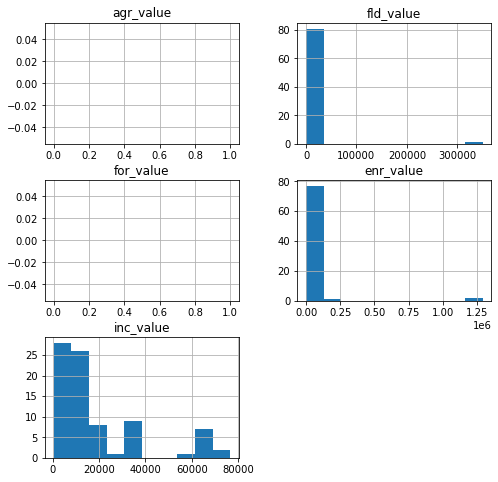

In [40]:
# checking rows with null agr_value 
df[df.agr_value.isnull()].hist(figsize = [8,8])

array([[<AxesSubplot:title={'center':'agr_value'}>,
        <AxesSubplot:title={'center':'fld_value'}>],
       [<AxesSubplot:title={'center':'for_value'}>,
        <AxesSubplot:title={'center':'enr_value'}>],
       [<AxesSubplot:title={'center':'inc_value'}>, <AxesSubplot:>]],
      dtype=object)

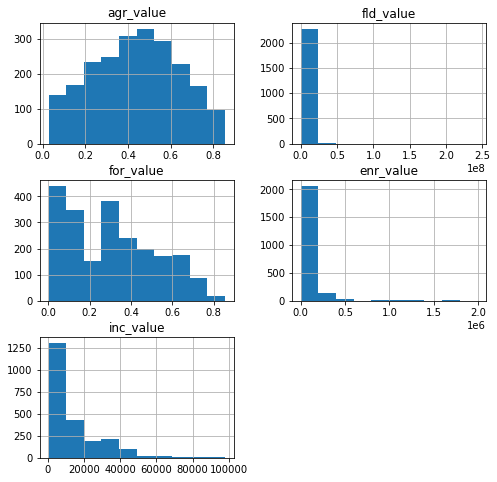

In [41]:
# see the general condition to compare with distribution above
df.hist(figsize = [8,8])

In [42]:
# since it seems that agr_value and for_value is correlated (null agr_value also has null for_value)
# then the characteristic of null value with general value is not that different,
# also for enr_value, the missing values are not that many,
# then we fill the null value with its mean
df.agr_value = df.groupby('country')['agr_value'].apply(lambda x: x.fillna(x.mean()))
df.for_value = df.groupby('country')['for_value'].apply(lambda x: x.fillna(x.mean()))
df.enr_value = df.groupby('country')['enr_value'].apply(lambda x: x.fillna(x.mean()))

In [43]:
# final check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2299 entries, 0 to 2298
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    2299 non-null   object 
 1   year       2299 non-null   object 
 2   agr_value  2299 non-null   float64
 3   fld_value  2299 non-null   float64
 4   for_value  2299 non-null   float64
 5   enr_value  2299 non-null   float64
 6   inc_value  2299 non-null   float64
dtypes: float64(5), object(2)
memory usage: 223.7+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> Now that i've trimmed and cleaned your data. I will compute statistics and create visualizations with the goal of addressing the research questions that I posed in the Introduction section. 


### Q1: Which regions have the lowest and highest performance of each indicator?

In [44]:
# see the descriptive stats for each country
desc_df = df.groupby('country').describe()

In [45]:
desc_df.head()

agr_value                                                           \
              count      mean       std    min     25%    50%     75%    max   
country                                                                        
Albania        19.0  0.412316  0.007079  0.393  0.4090  0.411  0.4160  0.431   
Algeria        19.0  0.167632  0.003804  0.162  0.1660  0.167  0.1705  0.173   
Angola         19.0  0.461158  0.000958  0.460  0.4605  0.461  0.4620  0.463   
Argentina      19.0  0.480474  0.021269  0.466  0.4680  0.469  0.4845  0.527   
Armenia        19.0  0.494588  0.065550  0.411  0.4620  0.468  0.5180  0.617   

          fld_value                ... enr_value           inc_value  \
              count          mean  ...       75%       max     count   
country                            ...                                 
Albania        19.0   6126.473684  ...    1300.0    2450.0      19.0   
Algeria        19.0  12434.052632  ...  156500.0  167000.0      19.0   
Angola         19.0  31140.684211  ...   54500.0  106000.0      19.0   
Argentina      19.0  61038.421053  ...   83600.0   87100.0      19.0   
Armenia        19.0    376.052632  ...     744.0     861.0      19.0   

                                                                          \
                   mean          std      min      25%      50%      75%   
country                                                                    
Albania     5477.368421  1866.612625   3020.0   4095.0   5060.0   6805.0   
Algeria    10630.000000  1215.113163   9170.0   9700.0  10300.0  11650.0   
Angola      4362.105263   912.113412   3060.0   3890.0   4240.0   4705.0   
Argentina  14684.210526  1854.203380  11400.0  13650.0  14500.0  15600.0   
Armenia     3681.578947  1728.040840   1840.0   2390.0   3220.0   4440.0   

                    
               max  
country             
Albania     9160.0  
Algeria    12700.0  
Angola      6470.0  
Argentina  18600.0  
Armenia     7560.0  

[5 rows x 40 columns]

##### Agricultural land data

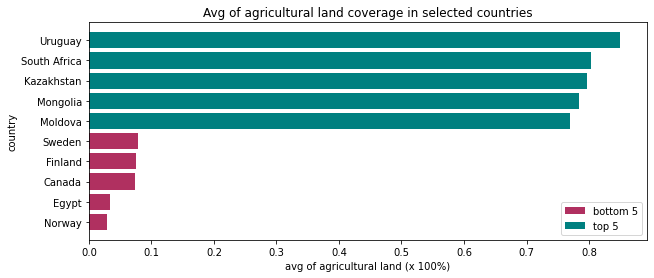

In [46]:
## get the lowest and highest mean for agr_value
small_agr = desc_df['agr_value']['mean'].nsmallest(5).sort_values()
large_agr = desc_df['agr_value']['mean'].nlargest(5).sort_values()

## create horizontal bar plot 
plt.figure(figsize=(10,4))
plt.barh(small_agr.index, small_agr.values, label='bottom 5', color='#B03060')
plt.barh(large_agr.index, large_agr.values, label='top 5', color='#008080')
plt.title('Avg of agricultural land coverage in selected countries')
plt.ylabel('country')
plt.xlabel('avg of agricultural land (x 100%)')
plt.legend()

<font color = 'blue'>
<ul>
    <li>There are 5 top countries that have the largest agricultural land. Those are <b>Uruguay, South Africa, Kazakhstan, Mongolia, and Moldova</b></li>
    <li>Actually <b>Kazakhstan and Mongolia are quite close geographically</b></li>
    <li>Then, there are 5 countries that have the smallest agricultural land. Those are <b>Sweden, Findland, Canada, Egypt, and Norway</b></li>
    <li>Three of the five countries are <b>Scandinavian countries</b></li>
</ul>  

##### Flood affected data

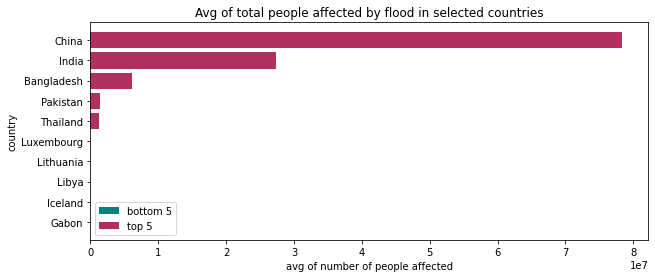

In [47]:
## get the lowest and highest mean for fld_value
small_fld = desc_df['fld_value']['mean'].nsmallest(5).sort_values()
large_fld = desc_df['fld_value']['mean'].nlargest(5).sort_values()

## create horizontal bar plot
plt.figure(figsize=(10,4))
plt.barh(small_fld.index, small_fld.values, label='bottom 5', color='#008080')
plt.barh(large_fld.index, large_fld.values, label='top 5', color='#B03060')
plt.title('Avg of total people affected by flood in selected countries')
plt.ylabel('country')
plt.xlabel('avg of number of people affected')
plt.legend()

In [48]:
# from the description in previous section, we knew that there are several records that have 0 value
# check countries who never cause people affected by flood
total_countries = df['country'].nunique()
total_fld_null = df.groupby('country').mean().query('fld_value == 0').shape[0]
total_fld_not_null = df.groupby('country').mean().query('fld_value > 0').shape[0]

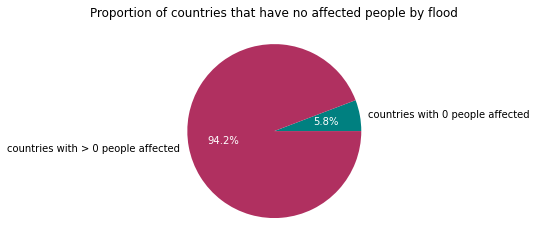

In [49]:
# set labels, sizes, and colors for param 
labels = 'countries with 0 people affected', 'countries with > 0 people affected'
sizes = [total_fld_null, total_fld_not_null]
colors = ['#008080','#B03060']

## create pie chart
fig1, ax1 = plt.subplots()
fig1, ax1, text = ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Proportion of countries that have no affected people by flood')

for t in text:
    t.set_color('white')
    

<font color = 'blue'>
<ul>
    <li>There are 5 top countries that have the most affected people by flood. Those are <b>China, India, Bangladesh, Pakistan, and Thailand</b></li>
    <li>The difference of number of people affected by flood in China is quite huge compared to India as the second rank </b></li>
    <li>Then, India and Bangladesh which are in the next ranks, are also close geographically</li>
    <li>5 countries that have the smallest number of people affected by flood are <b>Luxemburg, Lithuania, Libya, Iceland, and Gabon</b></li>
    <li>Other than that, there are 5.8% of countries that never have victim by flood</b></li>
</ul>  

##### Forest coverage data

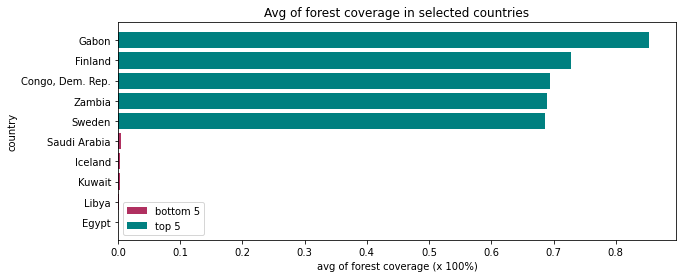

In [50]:
## get the lowest and highest mean for for_value
small_for = desc_df['for_value']['mean'].nsmallest(5).sort_values()
large_for = desc_df['for_value']['mean'].nlargest(5).sort_values()

## create horizontal bar plot
plt.figure(figsize=(10,4))
plt.barh(small_for.index, small_for.values, label='bottom 5', color='#B03060')
plt.barh(large_for.index, large_for.values, label='top 5', color='#008080')
plt.title('Avg of forest coverage in selected countries')
plt.ylabel('country')
plt.xlabel('avg of forest coverage (x 100%)')
plt.legend()

<font color = 'blue'>
<ul>
    <li><b>Gabon, Finland, Congo, Zambia, and Sweden</b> have the largest land for forest</li>
    <li><b>Saudi Arabia, Iceland, Kuwait, Libya, and Egypt</b> have the smallest land for forest</li>
</ul>  

##### Energy production data

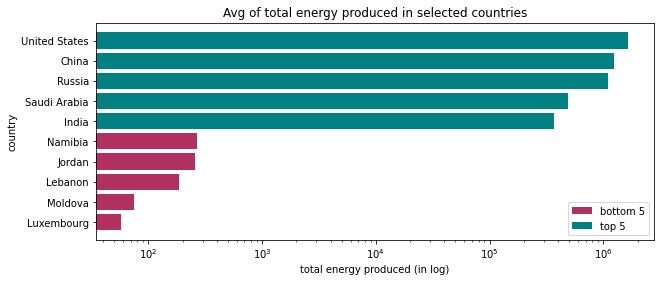

In [51]:
## get the lowest and highest mean for enr_value
small_enr = desc_df['enr_value']['mean'].nsmallest(5).sort_values()
large_enr = desc_df['enr_value']['mean'].nlargest(5).sort_values()

## create horizontal bar plot
plt.figure(figsize=(10,4))
plt.barh(small_enr.index, small_enr.values, label='bottom 5', color='#B03060')
plt.barh(large_enr.index, large_enr.values, label='top 5', color='#008080')
plt.title('Avg of total energy produced in selected countries')
plt.ylabel('country')
plt.xlabel('total energy produced (in log)')

plt.legend()

# set x axis into log mode because the gap between large and small data are quite huge
plt.xscale('log')
plt.show()

<font color = 'blue'>
<ul>
    <li><b>US, China, Russia, Saudi Arabia, and India</b> produced energy more than other countries</li>
    <li>Those top 5 countries are definitely one of the most powerful countries</li>
    <li>Meanwhile,<b>Namibia, Jordan, Lebanon, Moldova, and Luxembourg</b>are countries that produced the least energy</li>
</ul>  

##### Total income GDP

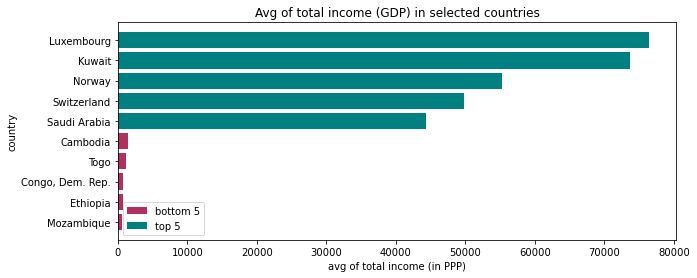

In [52]:
## get the lowest and highest mean for inc_value
small_inc = desc_df['inc_value']['mean'].nsmallest(5).sort_values()
large_inc = desc_df['inc_value']['mean'].nlargest(5).sort_values()

## create horizontal bar plot
plt.figure(figsize=(10,4))
plt.barh(small_inc.index, small_inc.values, label='bottom 5', color='#B03060')
plt.barh(large_inc.index, large_inc.values, label='top 5', color='#008080')
plt.title('Avg of total income (GDP) in selected countries')
plt.ylabel('country')
plt.xlabel('avg of total income (in PPP)')

plt.legend()

<font color = 'blue'>
<ul>
    <li><b>Luxembourg, Kuwait, Norway, Switzerland, and Saudi Arabia</b> have the highest total income</li>
    <li><b>Cambodia, Togo, Congo, Ethiopia, and Mozambique</b> have the lowest total income</li>
    <li>Most of the lowest income countries are in Africa region which we also know that in general, Africa has the lowest income compared to other region in the world</li>
</ul>  

### Q2: Have certain regions of the world been growing in each of the indicator?

In [53]:
# set the previous value for each indicator, this will be used to calculate the delta with current value
df['agr_value_prev'] = df.groupby(['country'])['agr_value'].shift(1)
df['fld_value_prev'] = df.groupby(['country'])['fld_value'].shift(1)
df['for_value_prev'] = df.groupby(['country'])['for_value'].shift(1)
df['enr_value_prev'] = df.groupby(['country'])['enr_value'].shift(1)
df['inc_value_prev'] = df.groupby(['country'])['inc_value'].shift(1)

In [54]:
df.head()

,country,year,agr_value,fld_value,for_value,enr_value,inc_value,agr_value_prev,fld_value_prev,for_value_prev,enr_value_prev,inc_value_prev
0,Albania,1990,0.409,0.0,0.288,2450.0,4460.0,NaN,NaN,NaN,NaN,NaN
1,Albania,1991,0.411,0.0,0.287,1920.0,3230.0,0.409,0.0,0.288,2450.0,4460.0
2,Albania,1992,0.411,35000.0,0.286,1400.0,3020.0,0.411,0.0,0.287,1920.0,3230.0
3,Albania,1993,0.411,0.0,0.286,1330.0,3320.0,0.411,35000.0,0.286,1400.0,3020.0
4,Albania,1994,0.411,0.0,0.285,1280.0,3620.0,0.411,0.0,0.286,1330.0,3320.0


In [55]:
# fill new columns to see the growth for each indicator
df['agr_growth'] = (df['agr_value'] - df['agr_value_prev']) / ((df['agr_value'] + df['agr_value_prev']) / 2 ) * 100
df['fld_growth'] = (df['fld_value'] - df['fld_value_prev']) / ((df['fld_value'] + df['fld_value_prev']) / 2 ) * 100
df['for_growth'] = (df['for_value'] - df['for_value_prev']) / ((df['for_value'] + df['for_value_prev']) / 2 ) * 100
df['enr_growth'] = (df['enr_value'] - df['enr_value_prev']) / ((df['enr_value'] + df['enr_value_prev']) / 2 ) * 100
df['inc_growth'] = (df['inc_value'] - df['inc_value_prev']) / ((df['inc_value'] + df['inc_value_prev']) / 2 ) * 100

In [56]:
df.head()

,country,year,agr_value,fld_value,for_value,enr_value,inc_value,agr_value_prev,fld_value_prev,for_value_prev,enr_value_prev,inc_value_prev,agr_growth,fld_growth,for_growth,enr_growth,inc_growth
0,Albania,1990,0.409,0.0,0.288,2450.0,4460.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,1991,0.411,0.0,0.287,1920.0,3230.0,0.409,0.0,0.288,2450.0,4460.0,0.487805,NaN,-0.347826,-24.256293,-31.989597
2,Albania,1992,0.411,35000.0,0.286,1400.0,3020.0,0.411,0.0,0.287,1920.0,3230.0,0.000000,200.0,-0.349040,-31.325301,-6.720000
3,Albania,1993,0.411,0.0,0.286,1330.0,3320.0,0.411,35000.0,0.286,1400.0,3020.0,0.000000,-200.0,0.000000,-5.128205,9.463722
4,Albania,1994,0.411,0.0,0.285,1280.0,3620.0,0.411,0.0,0.286,1330.0,3320.0,0.000000,NaN,-0.350263,-3.831418,8.645533


In [59]:
# i copied this for google to randomize the HEX number 
list_rgb = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(df['country'].nunique())]

##### Agricultural land data 

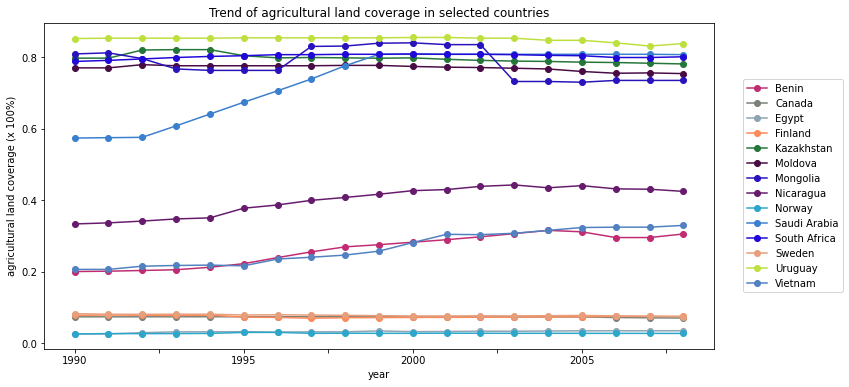

In [60]:
# filter countries to be shown in the chart
countries = df.groupby('country')['agr_growth'].mean().nlargest(5).index
cmb_prev = small_agr.index.append(large_agr.index)
fnl_countries = countries.append(cmb_prev)
temp_df = df[df.country.isin(fnl_countries)]

# create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Trend of agricultural land coverage in selected countries')
plt.ylabel('agricultural land coverage (x 100%)')
plt.xlabel('year')
# use unstack() to restructure and group the data
temp_df.groupby(['year','country']).mean()['agr_value'].unstack().plot(ax=ax, marker='o', color=list_rgb[0:len(fnl_countries)])

plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5))

<font color = 'blue'>
<ul>
    <li>There is a signifficant increase for Saudi Arabia from 1992 to 1999. After that, the trend is stagnant</li>
    <li>Nicaragua, Vietnam, and Benin have also increased gradually </li>
    <li>The other coutries that has the highest and lowest mean of agricultural land coverage do not have a significant growth</li>
</ul>  

##### Flood affected data

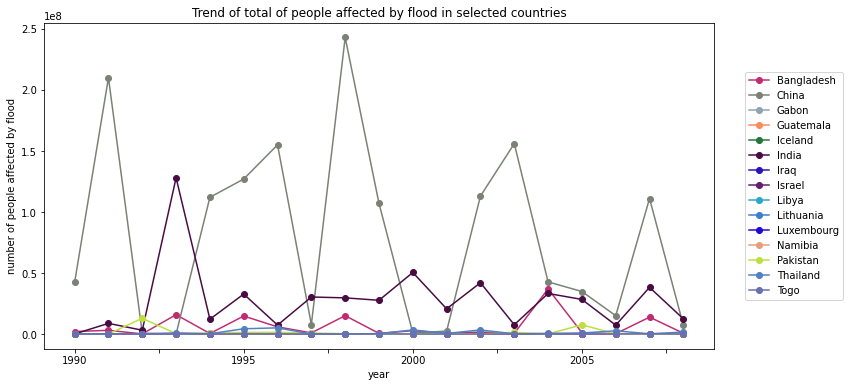

In [61]:
# filter countries to be shown in the chart
countries = df.groupby('country')['fld_growth'].mean().nlargest(5).index
cmb_prev = small_fld.index.append(large_fld.index)
fnl_countries = countries.append(cmb_prev)
temp_df = df[df.country.isin(fnl_countries)]

# create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Trend of total of people affected by flood in selected countries')
plt.ylabel('number of people affected by flood')
plt.xlabel('year')

# use unstack() to restructure and group the data
temp_df.groupby(['year','country']).mean()['fld_value'].unstack().plot(ax=ax, marker='o', color=list_rgb[0:len(fnl_countries)])

plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5))

<font color = 'blue'>
<ul>
    <li>Actually the chart would be better to be converted in moving average, because the trend is very fluctuative among each country</li>
</ul>  

In [62]:
temp_df.head()

,country,year,agr_value,fld_value,for_value,enr_value,inc_value,agr_value_prev,fld_value_prev,for_value_prev,enr_value_prev,inc_value_prev,agr_growth,fld_growth,for_growth,enr_growth,inc_growth
152,Bangladesh,1990,0.798,2010000.0,0.115,10800.0,1330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,Bangladesh,1991,0.793,2990000.0,0.115,10800.0,1340.0,0.798,2010000.0,0.115,10800.0,1330.0,-0.628536,39.200000,0.000000,0.000000,0.749064
154,Bangladesh,1992,0.734,75200.0,0.114,11400.0,1380.0,0.793,2990000.0,0.115,10800.0,1340.0,-7.727570,-190.186611,-0.873362,5.405405,2.941176
155,Bangladesh,1993,0.726,15800000.0,0.114,12000.0,1420.0,0.734,75200.0,0.114,11400.0,1380.0,-1.095890,198.105221,0.000000,5.128205,2.857143
156,Bangladesh,1994,0.719,395000.0,0.114,12400.0,1440.0,0.726,15800000.0,0.114,12000.0,1420.0,-0.968858,-190.243902,0.000000,3.278689,1.398601


In [63]:
temp_df['fld_value_SMA3'] = temp_df.groupby('country')['fld_value'].rolling(3).mean().values

<ipython-input-63-c85d19dcd80a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['fld_value_SMA3'] = temp_df.groupby('country')['fld_value'].rolling(3).mean().values


In [64]:
temp_df.head()

,country,year,agr_value,fld_value,for_value,enr_value,inc_value,agr_value_prev,fld_value_prev,for_value_prev,enr_value_prev,inc_value_prev,agr_growth,fld_growth,for_growth,enr_growth,inc_growth,fld_value_SMA3
152,Bangladesh,1990,0.798,2010000.0,0.115,10800.0,1330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,Bangladesh,1991,0.793,2990000.0,0.115,10800.0,1340.0,0.798,2010000.0,0.115,10800.0,1330.0,-0.628536,39.200000,0.000000,0.000000,0.749064,NaN
154,Bangladesh,1992,0.734,75200.0,0.114,11400.0,1380.0,0.793,2990000.0,0.115,10800.0,1340.0,-7.727570,-190.186611,-0.873362,5.405405,2.941176,1.691733e+06
155,Bangladesh,1993,0.726,15800000.0,0.114,12000.0,1420.0,0.734,75200.0,0.114,11400.0,1380.0,-1.095890,198.105221,0.000000,5.128205,2.857143,6.288400e+06
156,Bangladesh,1994,0.719,395000.0,0.114,12400.0,1440.0,0.726,15800000.0,0.114,12000.0,1420.0,-0.968858,-190.243902,0.000000,3.278689,1.398601,5.423400e+06


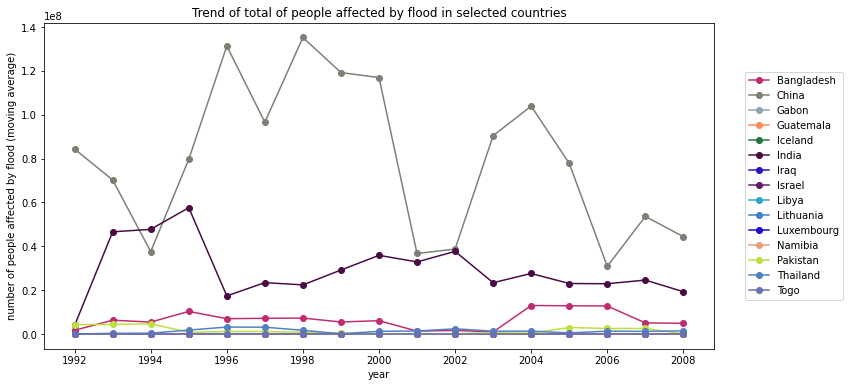

In [65]:
# create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Trend of total of people affected by flood in selected countries')
plt.ylabel('number of people affected by flood (moving average)')
plt.xlabel('year')

# use unstack() to restructure and group the data
temp_df.groupby(['year','country']).mean()['fld_value_SMA3'].unstack().plot(ax=ax, marker='o', color=list_rgb[0:len(fnl_countries)])

plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5))

<font color = 'blue'>
<ul>
    <li>After we calculate 3 year moving average, the trend is a bit smoother. But we can see China is still the only country that has a high trend</li>
    <li>Followed by India that also has a high trend</li>
</ul>  

##### Forest coverage data

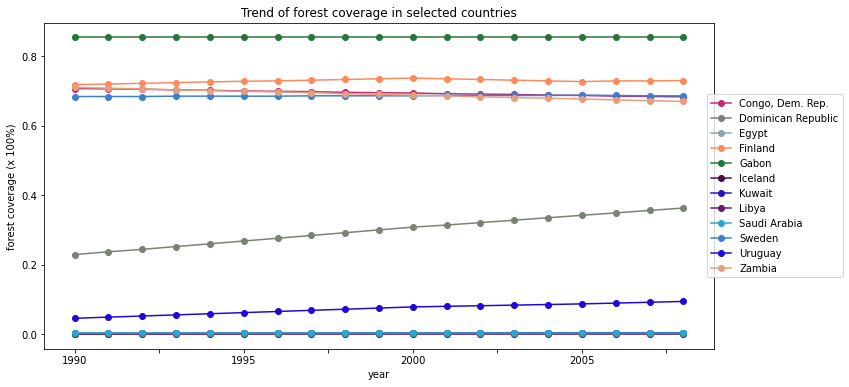

In [66]:
# filter countries to be shown in the chart
countries = df.groupby('country')['for_growth'].mean().nlargest(5).index
cmb_prev = small_for.index.append(large_for.index)
fnl_countries = countries.append(cmb_prev)
temp_df = df[df.country.isin(fnl_countries)]

# create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Trend of forest coverage in selected countries')
plt.ylabel('forest coverage (x 100%)')
plt.xlabel('year')

# use unstack() to restructure and group the data
temp_df.groupby(['year','country']).mean()['for_value'].unstack().plot(ax=ax, marker='o', color=list_rgb[0:len(fnl_countries)])

plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5))

<font color = 'blue'>
<ul>
    <li>Dominican Republic is gradually increasing from time to time</li>
</ul>  

##### Energy production data

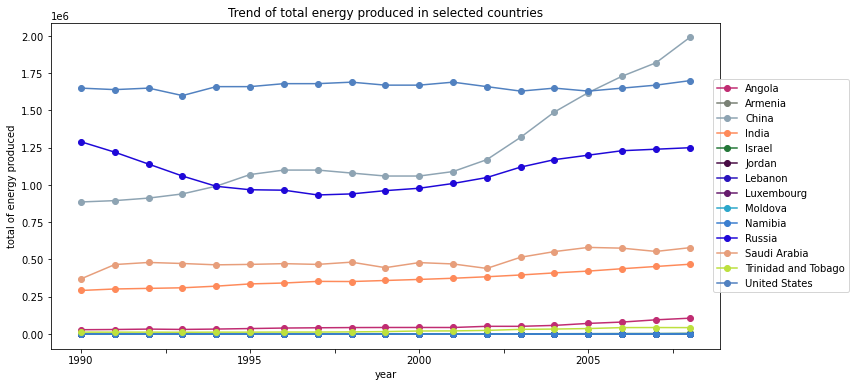

In [67]:
# filter countries to be shown in the chart
countries = df.groupby('country')['enr_growth'].mean().nlargest(5).index
cmb_prev = small_enr.index.append(large_enr.index)
fnl_countries = countries.append(cmb_prev)
temp_df = df[df.country.isin(fnl_countries)]

# create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Trend of total energy produced in selected countries')
plt.ylabel('total of energy produced')
plt.xlabel('year')

# use unstack() to restructure and group the data
temp_df.groupby(['year','country']).mean()['enr_value'].unstack().plot(ax=ax, marker='o', color=list_rgb[0:len(fnl_countries)])

plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5))

<font color = 'blue'>
<ul>
    <li>China experienced a significant increase from 2000 onwards, we can see its good growth </li>
    <li>Russia ever has a drop from 1990 until 1994. But it started to gradually increase from 2000 </li>
</ul>  

##### Income data

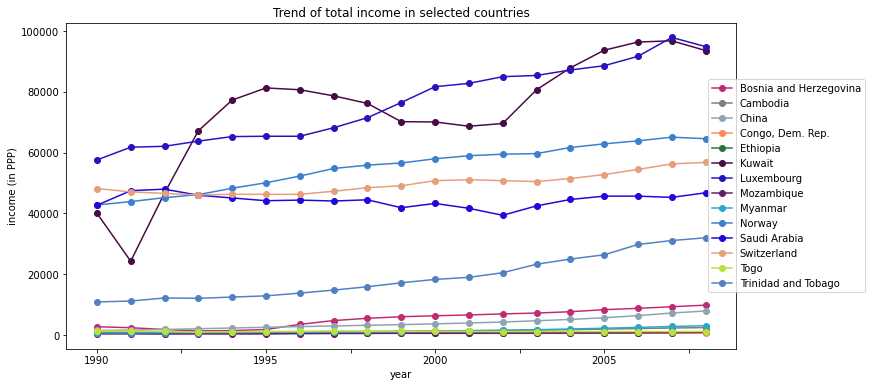

In [68]:
# filter countries to be shown in the chart
countries = df.groupby('country')['inc_growth'].mean().nlargest(5).index
cmb_prev = small_inc.index.append(large_inc.index)
fnl_countries = countries.append(cmb_prev)
temp_df = df[df.country.isin(fnl_countries)]

# create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Trend of total income in selected countries')
plt.ylabel('income (in PPP)')
plt.xlabel('year')

# use unstack() to restructure and group the data
temp_df.groupby(['year','country']).mean()['inc_value'].unstack().plot(ax=ax, marker='o', color=list_rgb[0:len(fnl_countries)])

plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5))

<font color = 'blue'>
<ul>
    <li>Luxembourg has a consistent trend. it's always increasing until now</li>
    <li>Kuwait also has a high total income, but its trend sometimes ups and downs</li>
    <li>Norway, Switzerland, and Trinidad & Tobago started were stagnant at first, but then gradually increasing until now</li>
    <li>Meanwhile Saudi Arabia's total income starts to decrease </li>
</ul>  

### Q3: Is there any correlation between selected indicators?

array([[<AxesSubplot:xlabel='agr_value', ylabel='agr_value'>,
        <AxesSubplot:xlabel='fld_value', ylabel='agr_value'>,
        <AxesSubplot:xlabel='for_value', ylabel='agr_value'>,
        <AxesSubplot:xlabel='enr_value', ylabel='agr_value'>,
        <AxesSubplot:xlabel='inc_value', ylabel='agr_value'>],
       [<AxesSubplot:xlabel='agr_value', ylabel='fld_value'>,
        <AxesSubplot:xlabel='fld_value', ylabel='fld_value'>,
        <AxesSubplot:xlabel='for_value', ylabel='fld_value'>,
        <AxesSubplot:xlabel='enr_value', ylabel='fld_value'>,
        <AxesSubplot:xlabel='inc_value', ylabel='fld_value'>],
       [<AxesSubplot:xlabel='agr_value', ylabel='for_value'>,
        <AxesSubplot:xlabel='fld_value', ylabel='for_value'>,
        <AxesSubplot:xlabel='for_value', ylabel='for_value'>,
        <AxesSubplot:xlabel='enr_value', ylabel='for_value'>,
        <AxesSubplot:xlabel='inc_value', ylabel='for_value'>],
       [<AxesSubplot:xlabel='agr_value', ylabel='enr_value'>,
     

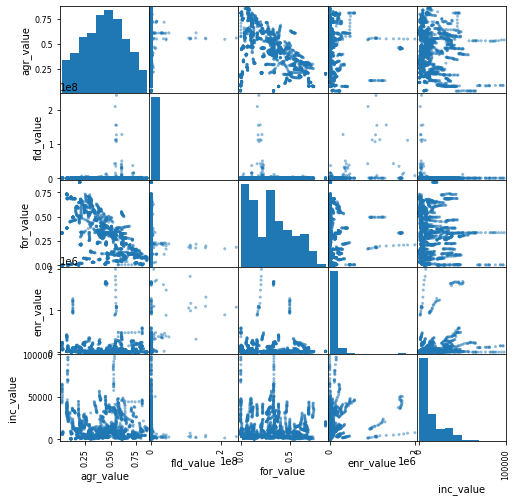

In [69]:
# to see the correlation matrix plot
pd.plotting.scatter_matrix(df[['agr_value','fld_value','for_value','enr_value','inc_value']], figsize=(8,8))

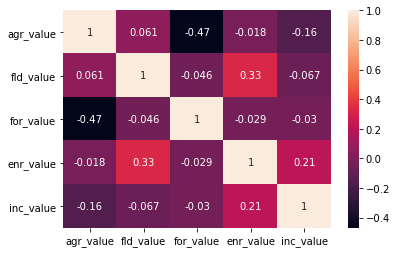

In [70]:
# since we can't really sure about the coefficient from the plot above, we may need the number of each pair of variables
sns.heatmap(df[['agr_value','fld_value','for_value','enr_value','inc_value']].corr(), annot=True)
plt.show()

<font color = 'blue'>
<ul>
    <li>Agricultural land coverage and forest coverage have negative moderate correlation<b></li>
    <li>Total number of people affected by flood and total number of energy produced have positive weak correlation</li>
    <li>As well as total number of energy produced and total income have positive weak correlation</li>
</ul>  

<a id='conclusions'></a>
## Conclusions

> Gapminder has collected a lot of information about how people live their lives in different countries, tracked accross the years, and on a number of different indicators
> In this project, I will choose 5 indicators to investigate

<ul>
<li>Agricultural land = Refers to the share of land area that is arable, under permanent crops, and under permanent pastures (scala from 0-1, should be multiplied by 100% to convert to percentage)</li>
<li>Flood affected = Total number of people getting affected, injured, or killed in flood during given year (number of people) </li>
<li>Forest coverage = Percentage of total land area that has been covered with forest during the given year, excluding other wood land which is spanning more than 0.5 hectares, with trees higher than 5 meters and a canopy cover of 5-10 percent (scala: from 0-1, should be multiplied by 100% to convert to percentage)</li>
<li>Energy production = Refers to forms of primary energy (number of products)</li>
<li>Income = Gross domestic product per person, inflation adjusted. (in PPP)</li>
</ul>


### Which regions have the lowest and highest performance of each indicator? 
To see the lowest and highest performance of each indicator, I used mean to see one number that describes the 'performance'

###### Agricultural land coverage 
<ul>
    <li>There are 5 top countries that have the largest agricultural land. Those are <b>Uruguay, South Africa, Kazakhstan, Mongolia, and Moldova</b></li>
    <li>Actually <b>Kazakhstan and Mongolia are quite close geographically</b></li>
    <li>Then, there are 5 countries that have the smallest agricultural land. Those are <b>Sweden, Finland, Canada, Egypt, and Norway</b></li>
    <li>Three of the five countries are <b>Scandinavian countries</b></li>
</ul>  

###### People affected by flood
<ul>
    <li>There are 5 top countries that have the most affected people by flood. Those are <b>China, India, Bangladesh, Pakistan, and Thailand</b></li>
    <li>The difference of number of people affected by flood in China is quite huge compared to India as the second rank </b></li>
    <li>Then, India and Bangladesh which are in the next ranks, are also close geographically</li>
    <li>5 countries that have the smallest number of people affected by flood are <b>Luxemburg, Lithuania, Libya, Iceland, and Gabon</b></li>
    <li>Other than that, there are <b>5.8%</b> of countries that never have victim by flood</b></li>
</ul>  

###### Forest coverage
<ul>
    <li><b>Gabon, Finland, Congo, Zambia, and Sweden</b> have the largest land for forest</li>
    <li><b>Saudi Arabia, Iceland, Kuwait, Libya, and Egypt</b> have the smallest land for forest</li>
</ul>


###### Total energy produced
<ul>
    <li><b>US, China, Russia, Saudi Arabia, and India</b> produced energy more than other countries</li>
    <li>Those top 5 countries are definitely one of the most powerful countries</li>
    <li>Meanwhile,<b>Namibia, Jordan, Lebanon, Moldova, and Luxembourg</b>are countries that produced the least energy</li>
</ul> 


###### Total income
<ul>
    <li><b>Luxembourg, Kuwait, Norway, Switzerland, and Saudi Arabia</b> have the highest total income</li>
    <li><b>Cambodia, Togo, Congo, Ethiopia, and Mozambique</b> have the lowest total income</li>
    <li>Most of the lowest income countries are in Africa region which we also know that in general, Africa has the lowest income compared to other region in the world</li>
</ul>  



### Have certain regions of the world been growing in each of the indicator? 

###### Agricultural land coverage 
<ul>
    <li>There is a significant increase for <b>Saudi Arabia from 1992 to 1999</b>. After that, the trend is stagnant</li>
    <li><b>Nicaragua, Vietnam, and Benin</b> have also increased gradually </li>
    <li>The other countries that has the highest and lowest mean of agricultural land coverage do not have a significant growth</li>
</ul>  


###### People affected by flood
<ul>
    <li>We can see <b>China</b> is still the only country that has a high trend</li>
    <li>Followed by <b>India</b> that also has a high trend</li>
</ul>  

###### Forest coverage
<ul>
    <li><b>Dominican Republic</b> is gradually increasing from time to time</li>
</ul>  


###### Total energy produced
<ul>
    <li><b>China experienced a significant increase from 2000 onwards</b>, we can see its good growth </li>
    <li><b>Russia</b> ever had a drop from 1990 until 1994. But it started to gradually increase from 2000 </li>
</ul>  


###### Total income
<ul>
    <li><b>Luxembourg</b> has a consistent trend. it's always increasing until now</li>
    <li><b>Kuwait</b> also has a high total income, but its trend sometimes ups and downs</li>
    <li><b>Norway, Switzerland, and Trinidad & Tobago</b> started were stagnant at first, but then gradually increasing until now</li>
    <li>Meanwhile <b>Saudi Arabia's total income starts to decrease</b> </li>
</ul>  

### Is there any correlation between selected indicators? 
<ul>
    <li>Agricultural land coverage and forest coverage have <b>negative moderate correlation</b></li>
    <li>Total number of people affected by flood and total number of energy produced <b>have positive weak correlation</b></li>
    <li>As well as total number of energy produced and total income <b>have positive weak correlation</b></li>
</ul>  